In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting

from sklearn import preprocessing #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics

In [2]:
# Reading Dataset from repository
data = pd.read_csv('hr_data.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Data Understanding

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# check for null values

data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# selecting columns needed thereby dropping irrelevant ones

new_data = data[['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
new_data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,Male,4,2,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Research & Development,6,1,Medical,4,Male,2,3,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Research & Development,4,3,Life Sciences,2,Male,4,2,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Sales,2,3,Medical,4,Male,2,2,...,14,3,4,17,3,2,9,6,0,8


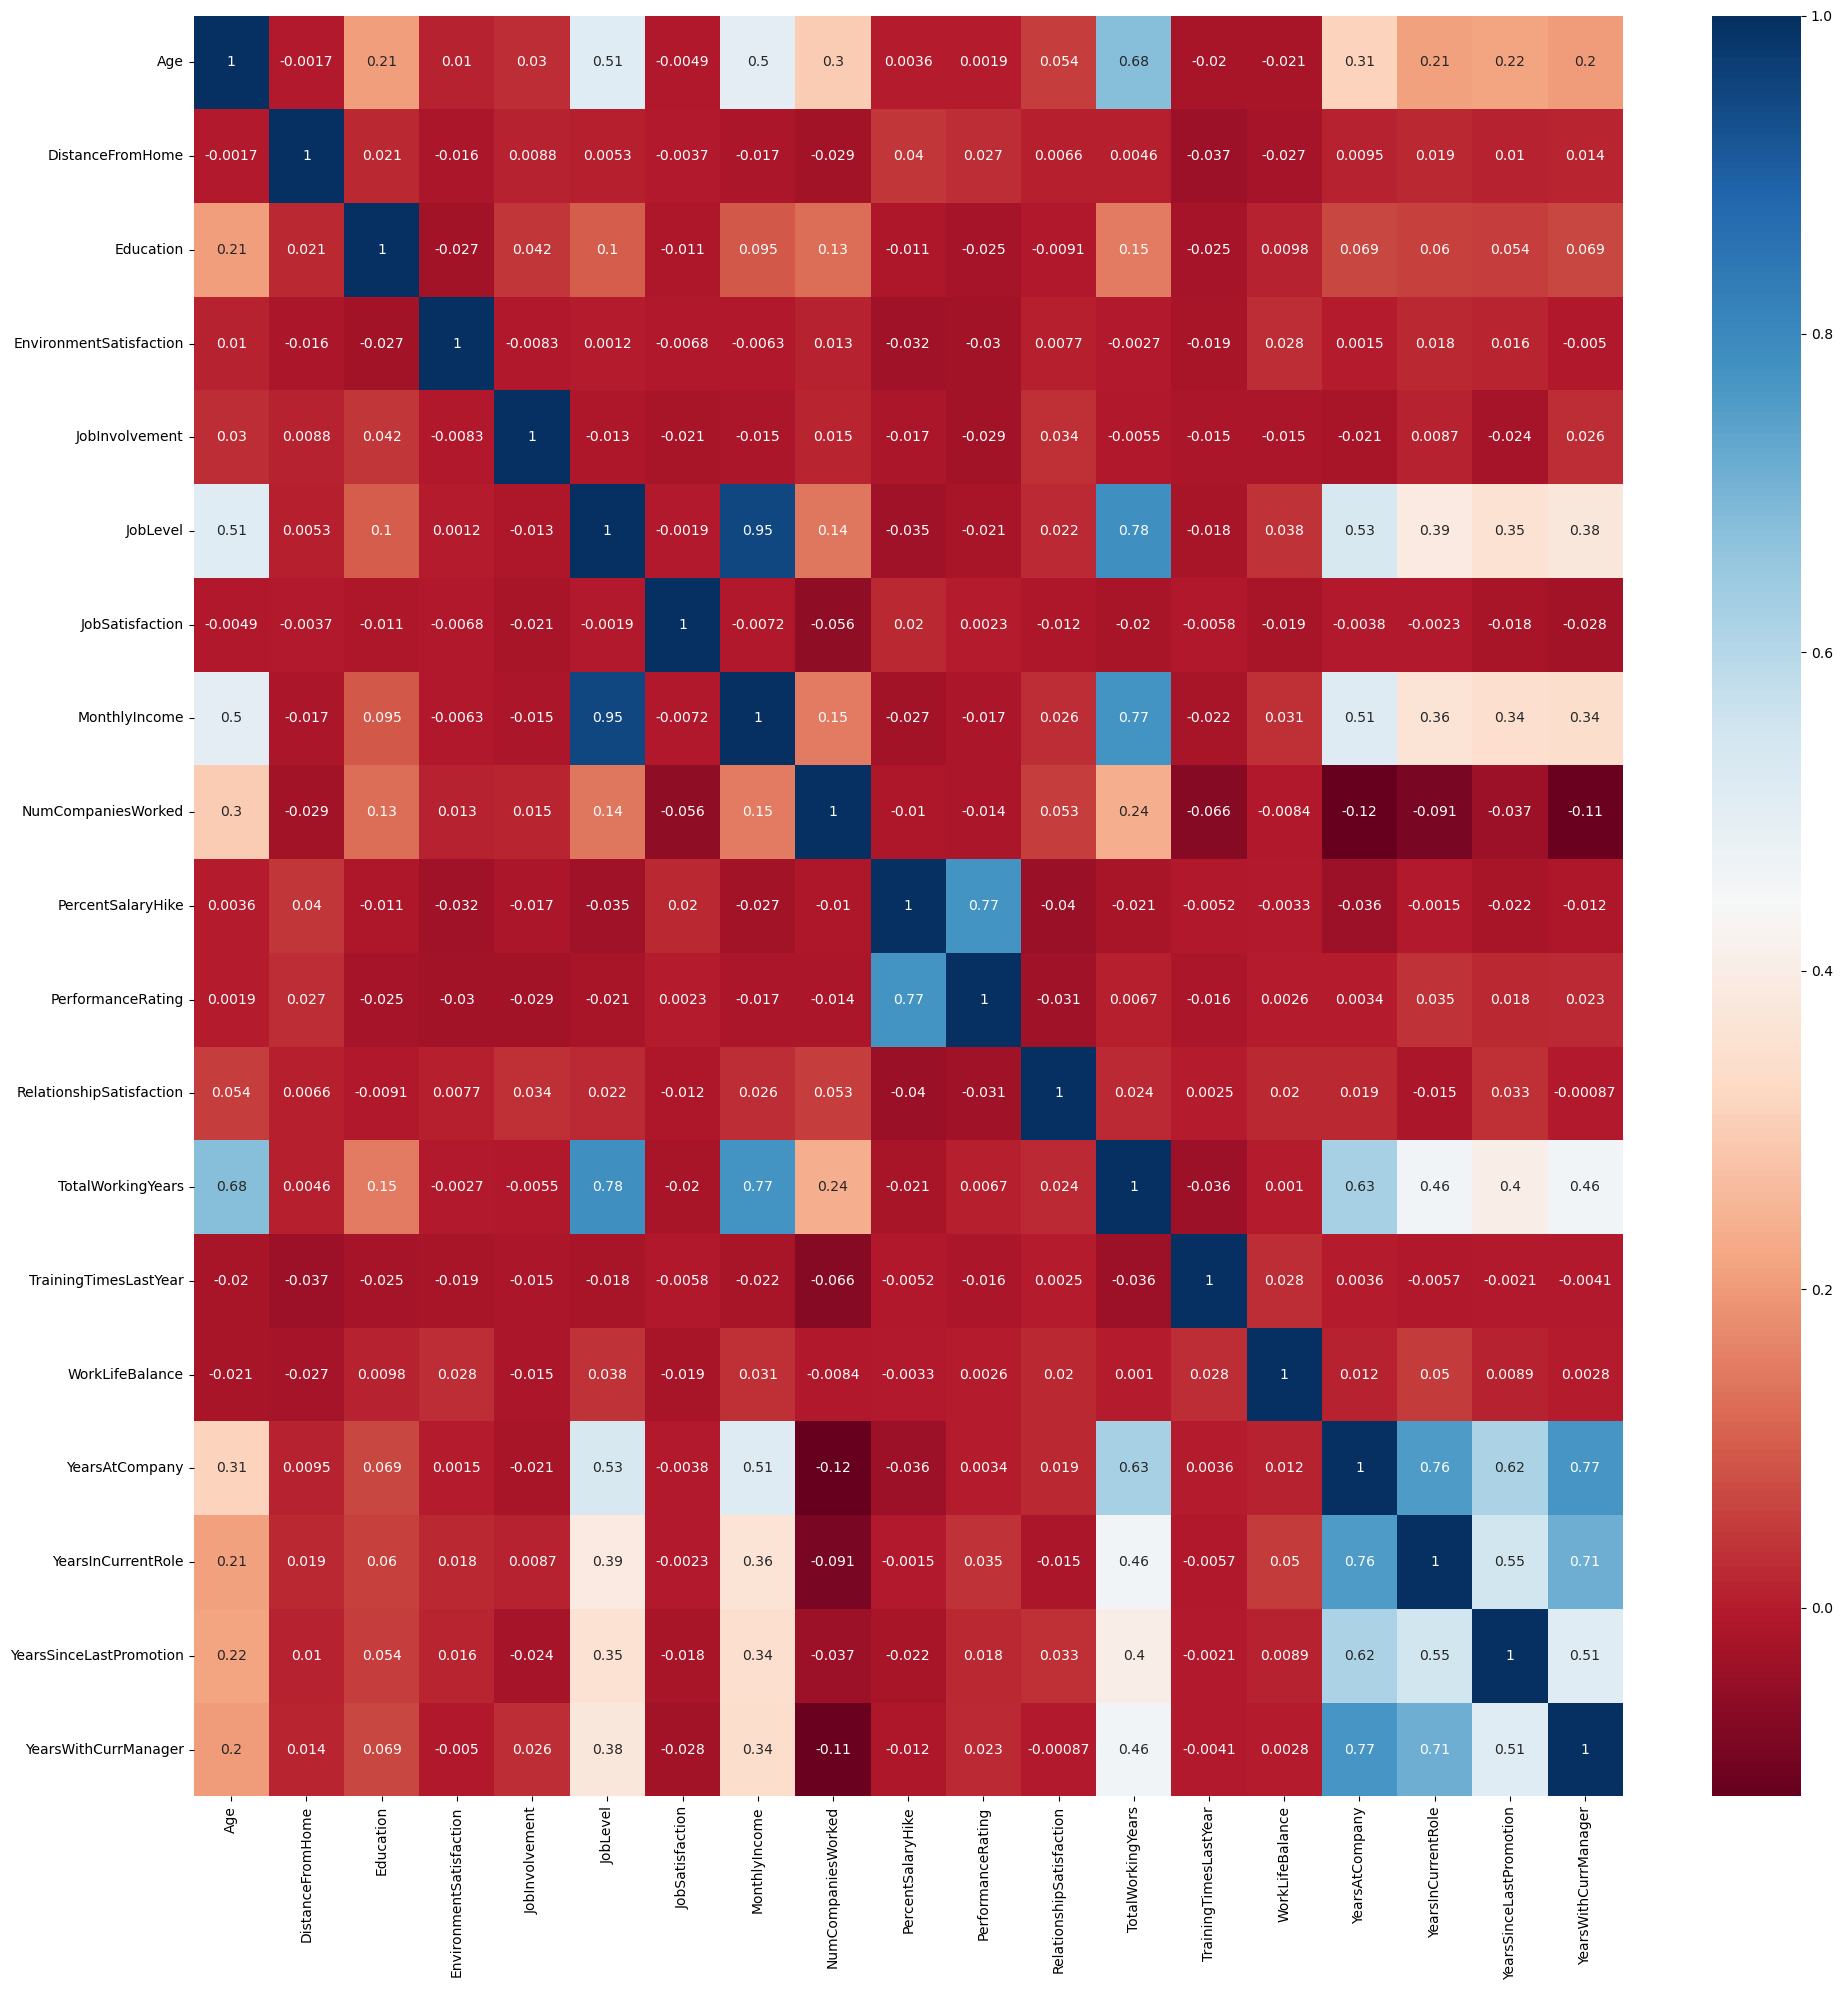

In [10]:
# Correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

In [11]:
new_data.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,-0.034730,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,-0.020608,-0.005221,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985


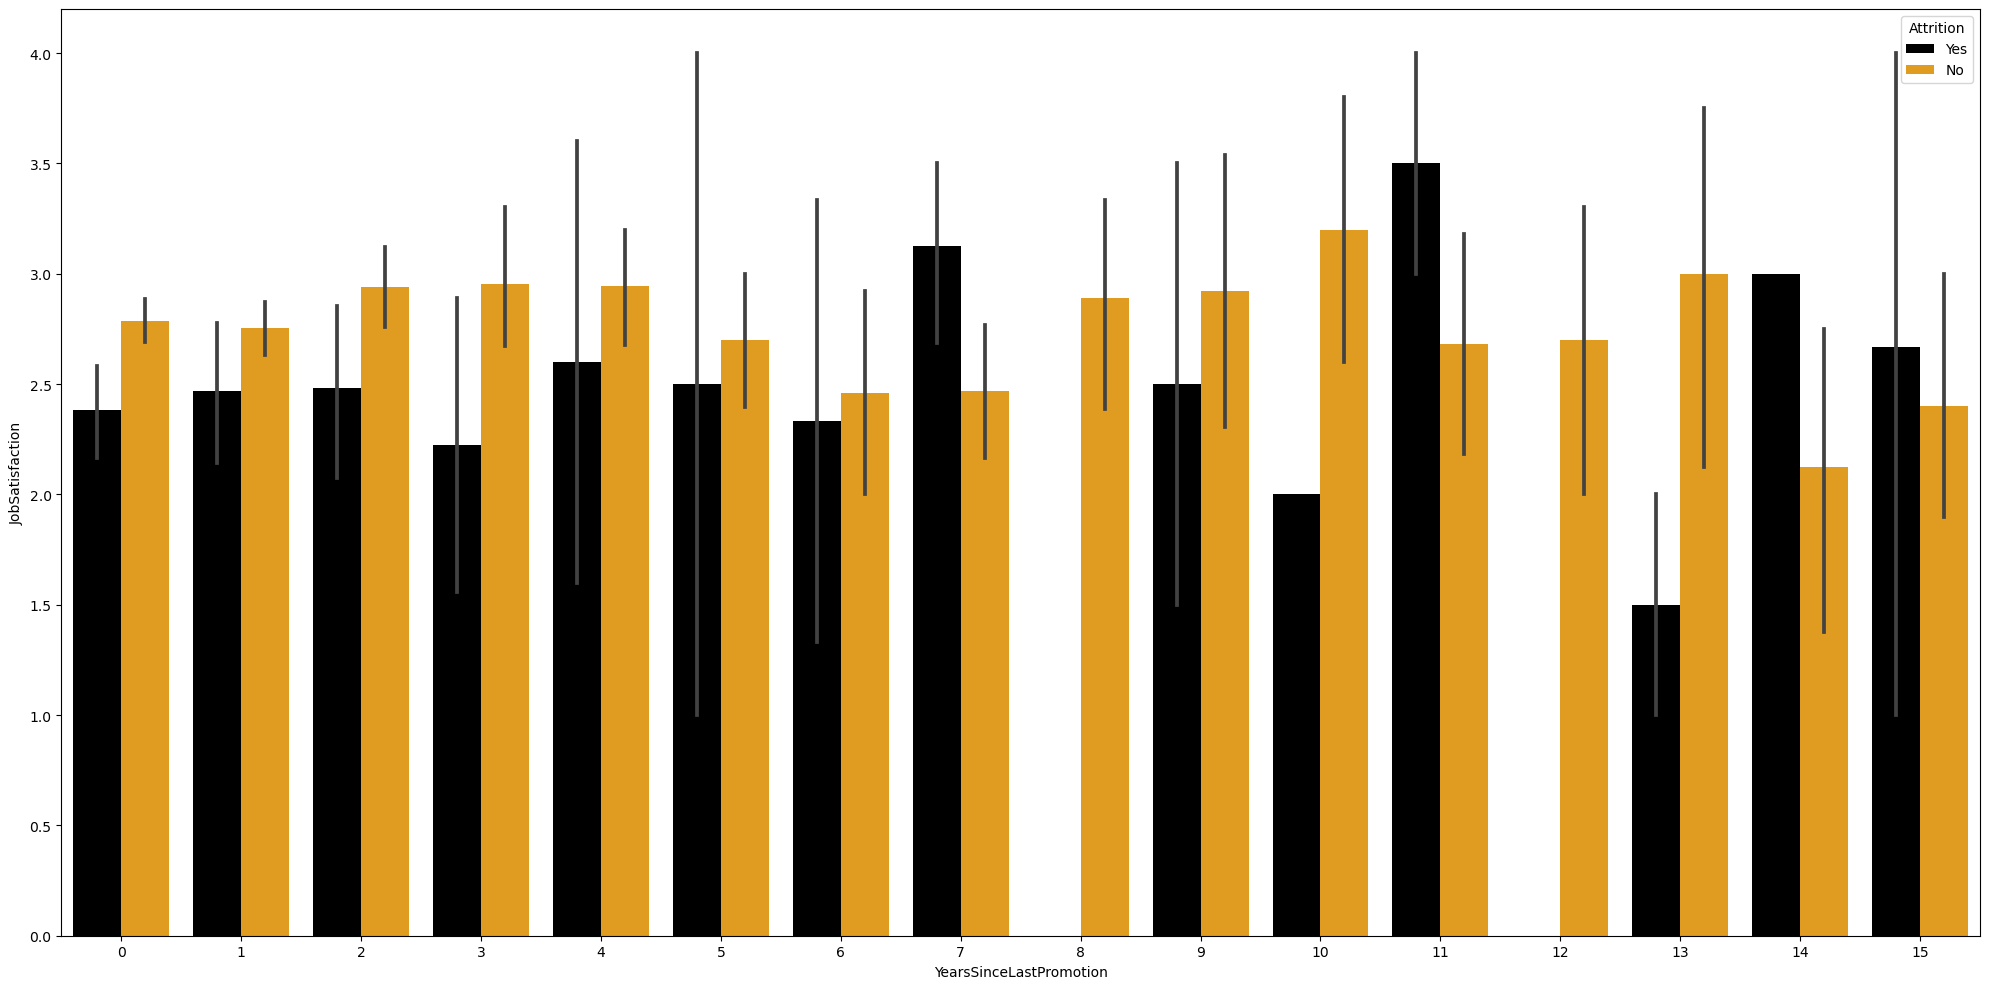

In [12]:
# Bar Plot with left values
plt.figure(figsize=(20,10))
sns.barplot(x=new_data.YearsSinceLastPromotion,
            y=new_data.JobSatisfaction,
            hue=new_data.Attrition,
            palette = ('black', 'orange'))
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


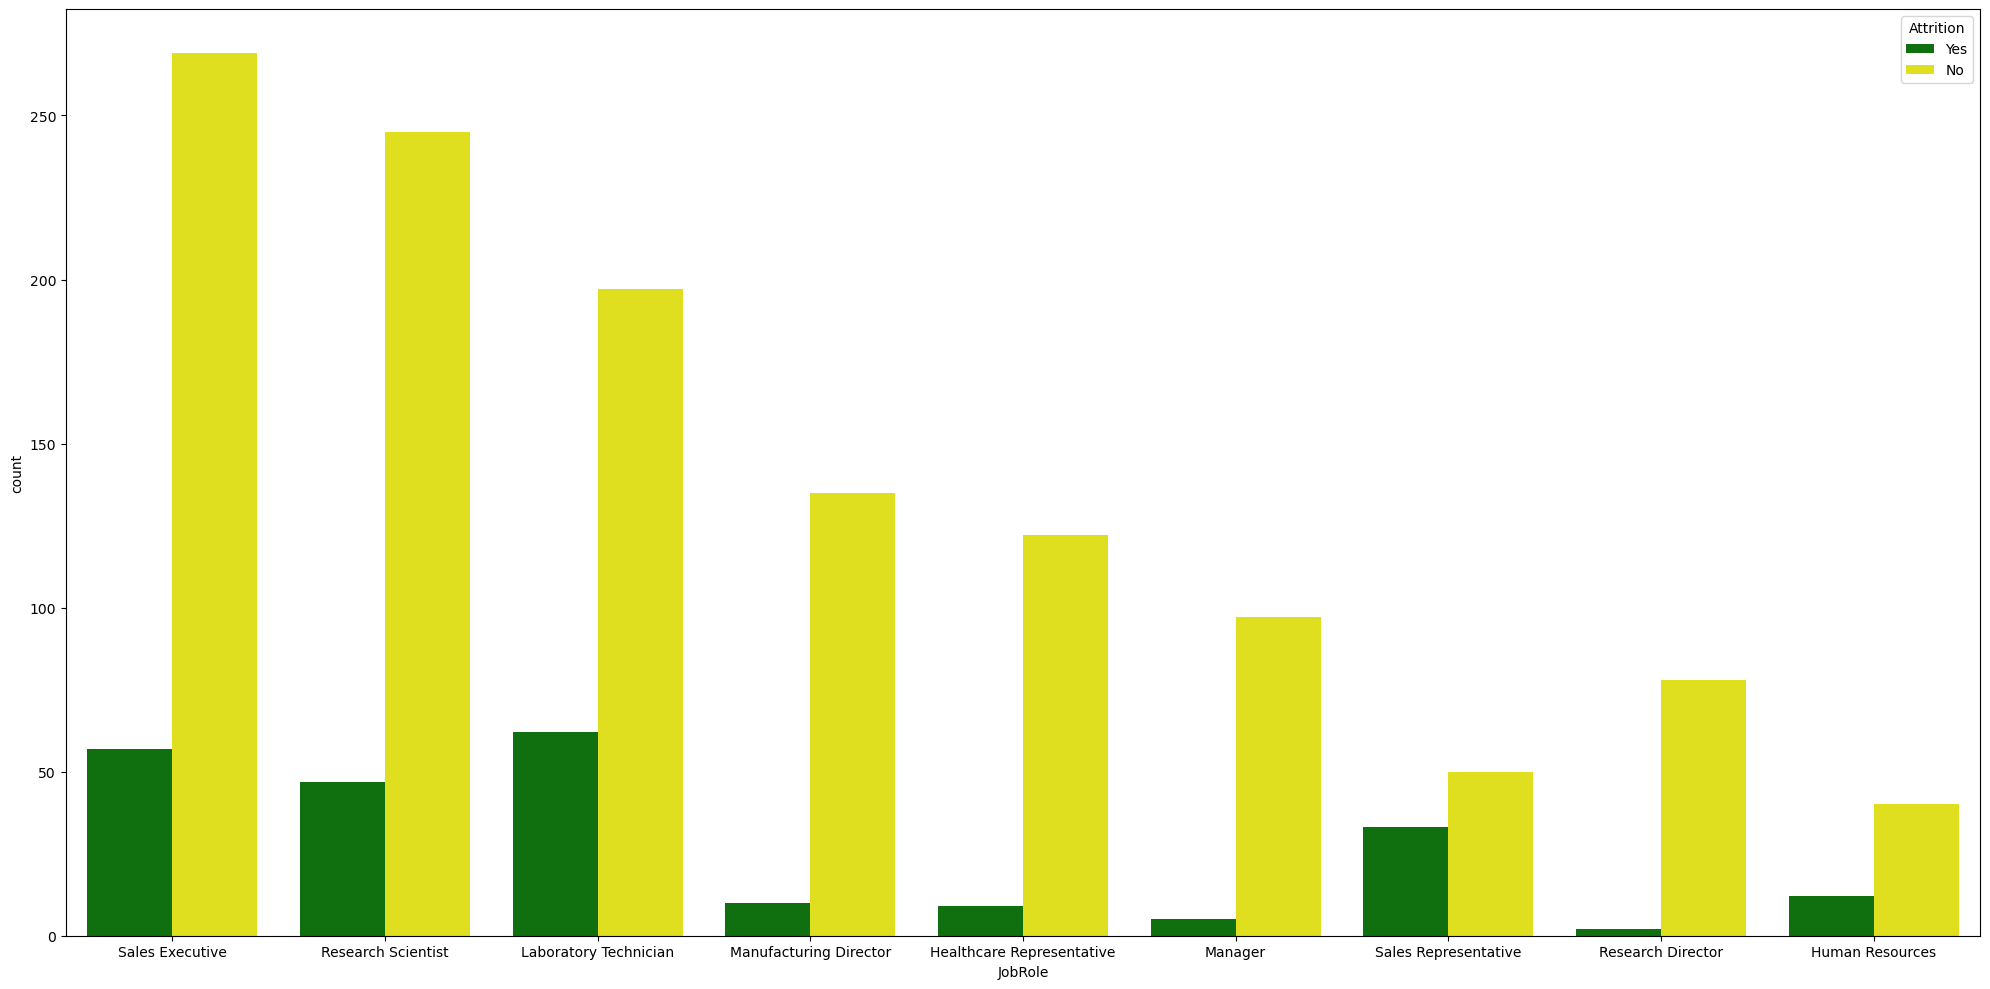

In [15]:
# Bar plot with left values
plt.figure(figsize=(20,10))
sns.countplot(new_data['JobRole'],
              hue = new_data['Attrition'],
              palette = ('green', 'yellow'))
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


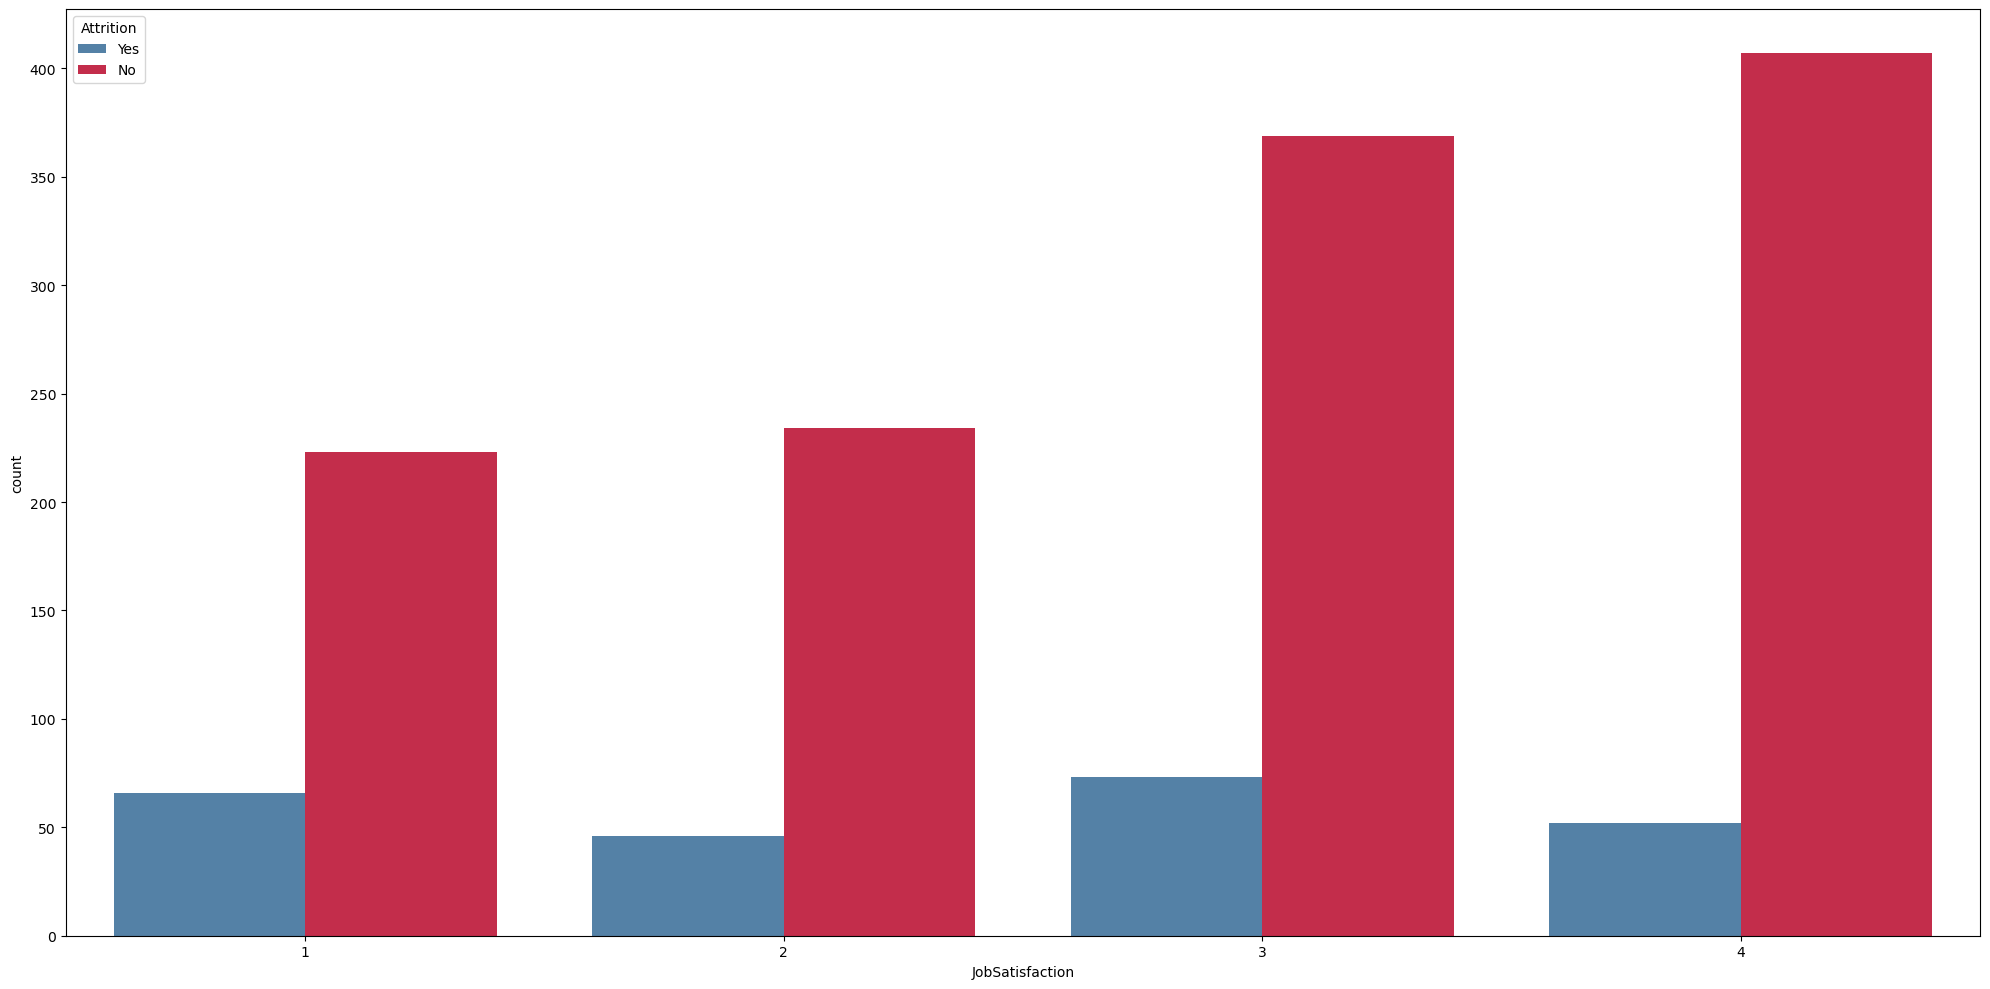

In [16]:
# Bar Plot with left values
plt.figure(figsize=(20,10))
sns.countplot(new_data['JobSatisfaction'],
              hue = new_data['Attrition'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


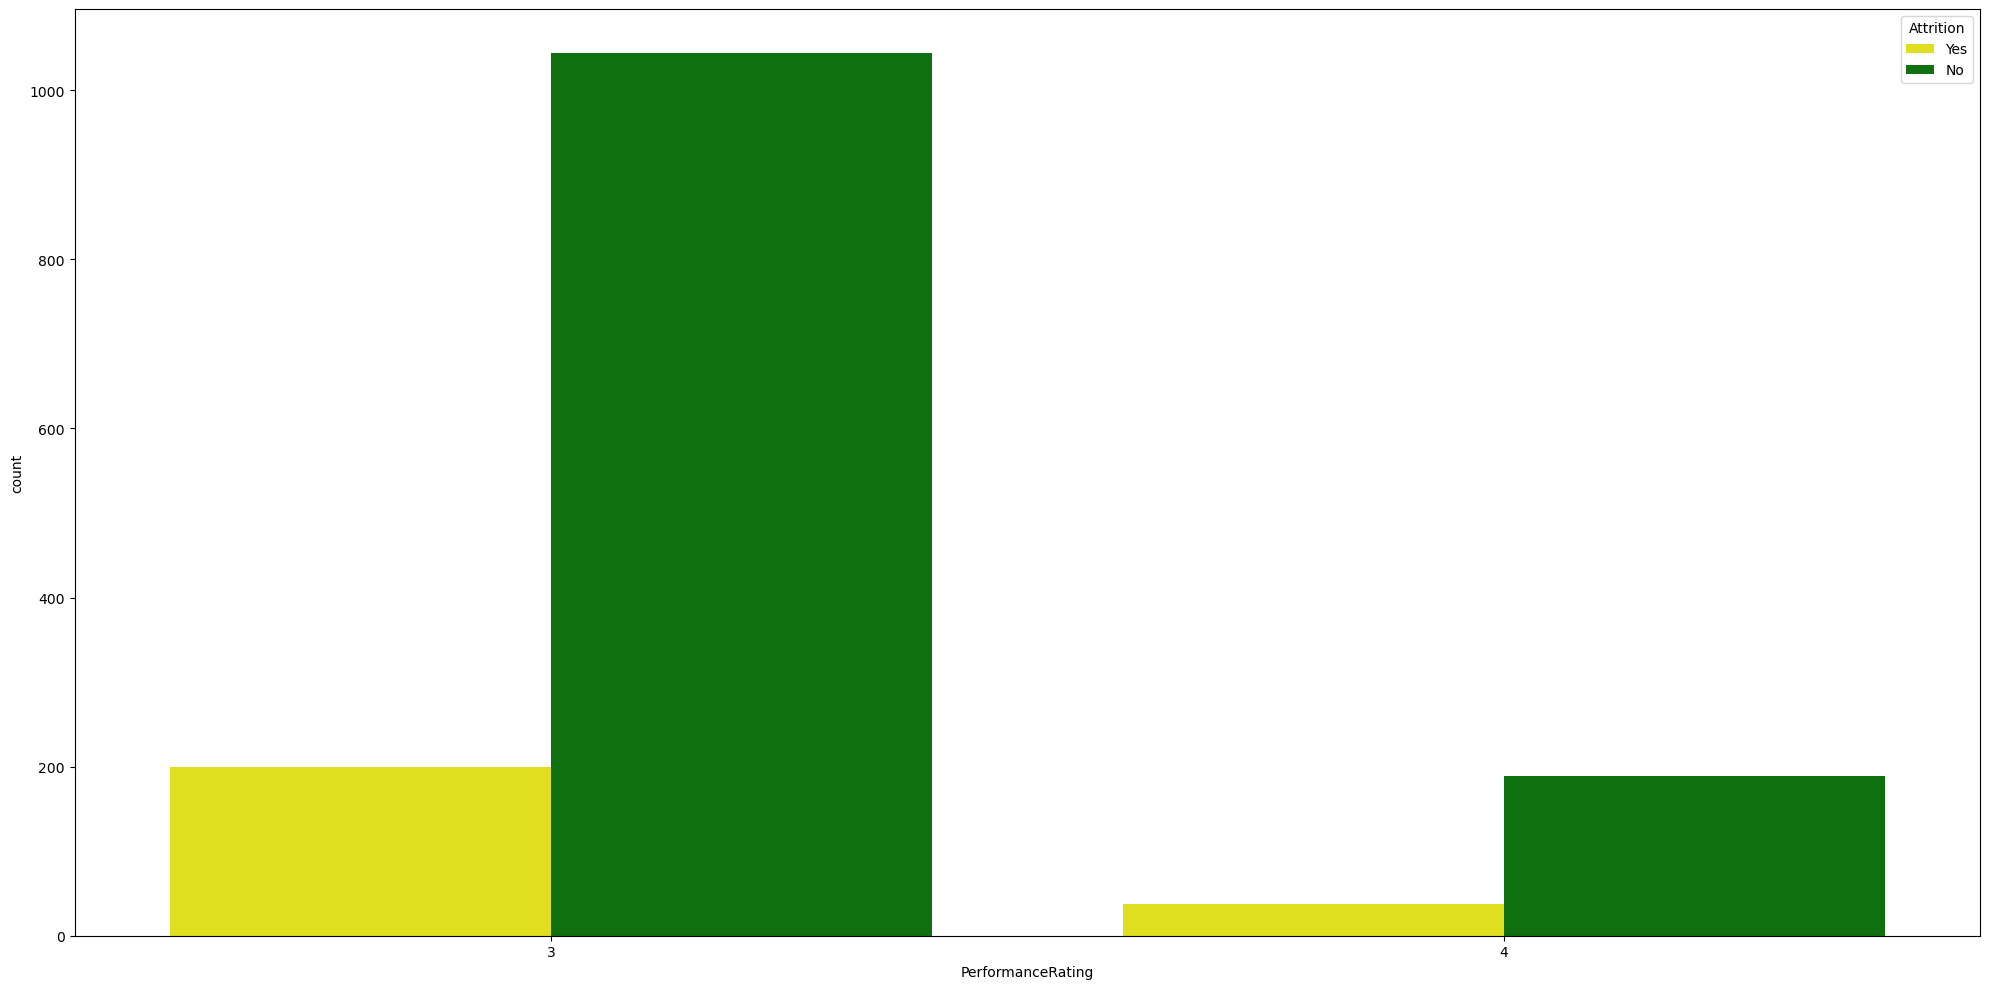

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(new_data['PerformanceRating'],
              hue = new_data['Attrition'],
              palette = ('yellow', 'green'))
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


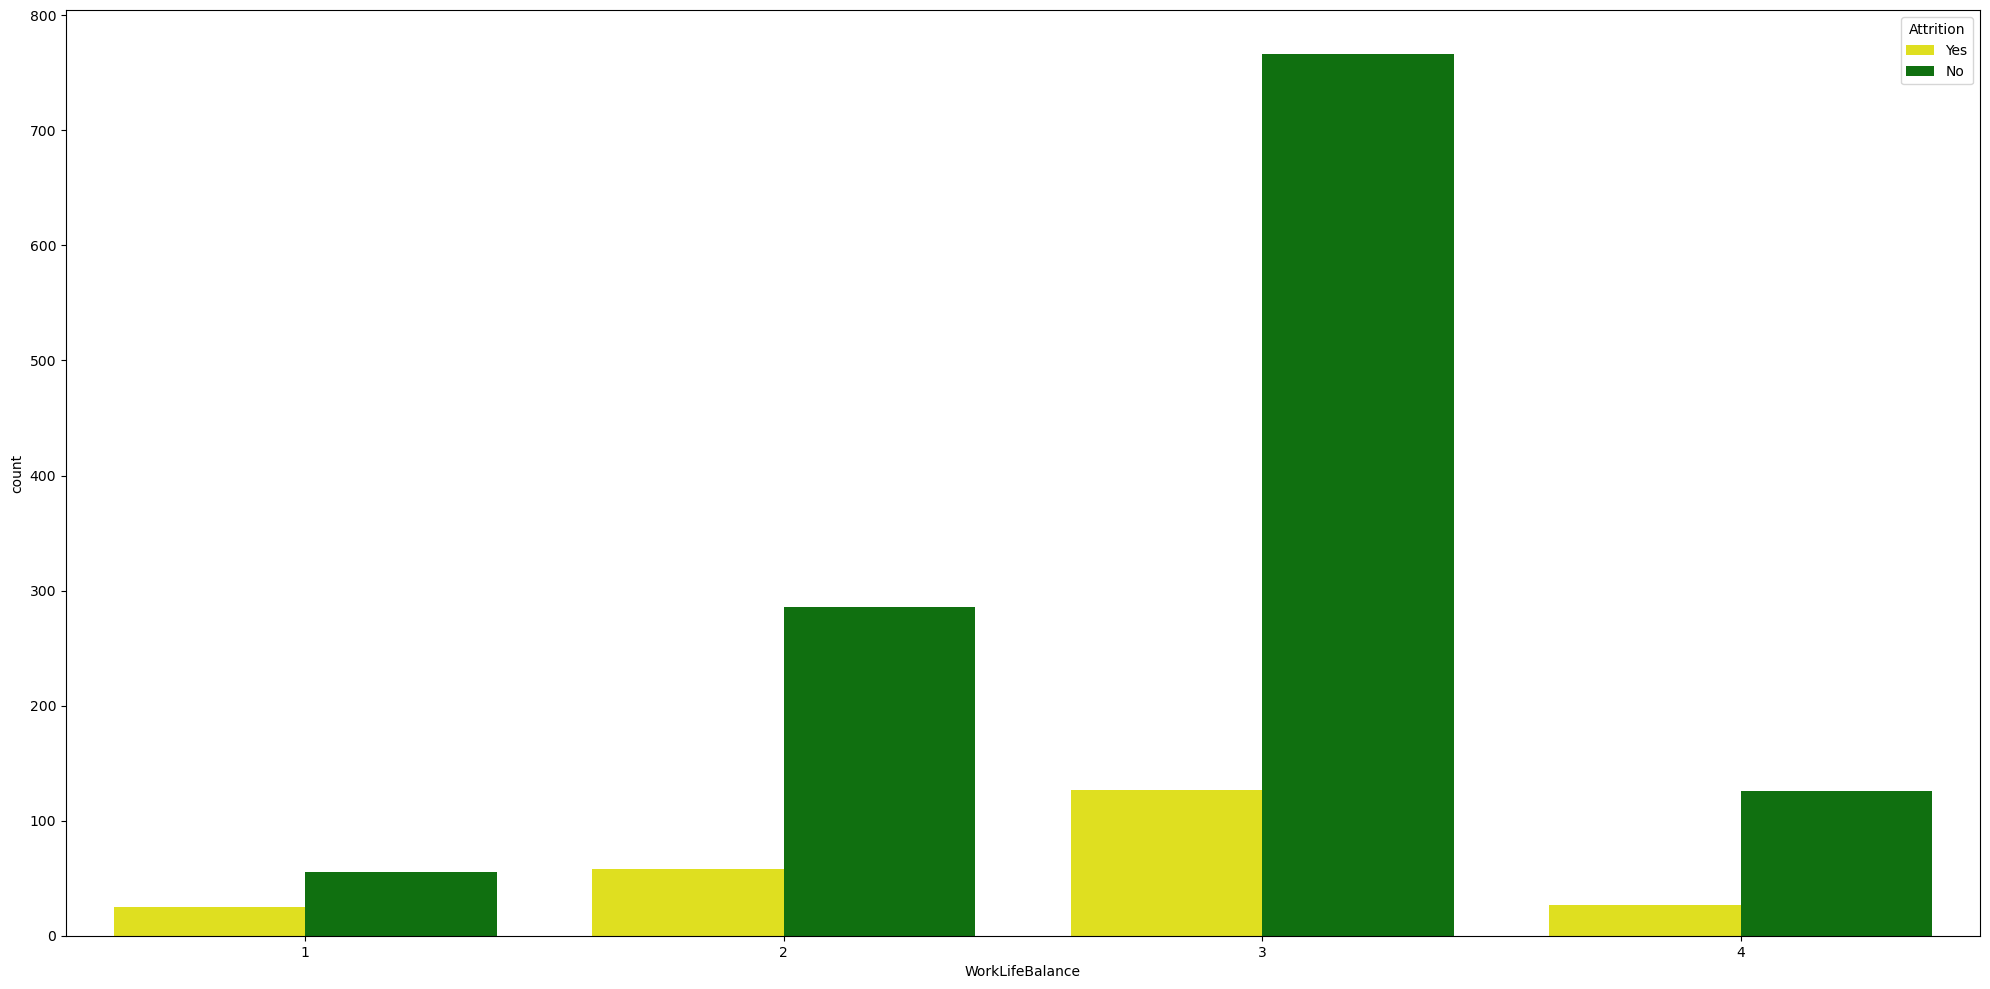

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(new_data['WorkLifeBalance'],
              hue = new_data['Attrition'],
              palette = ('yellow', 'green'))
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


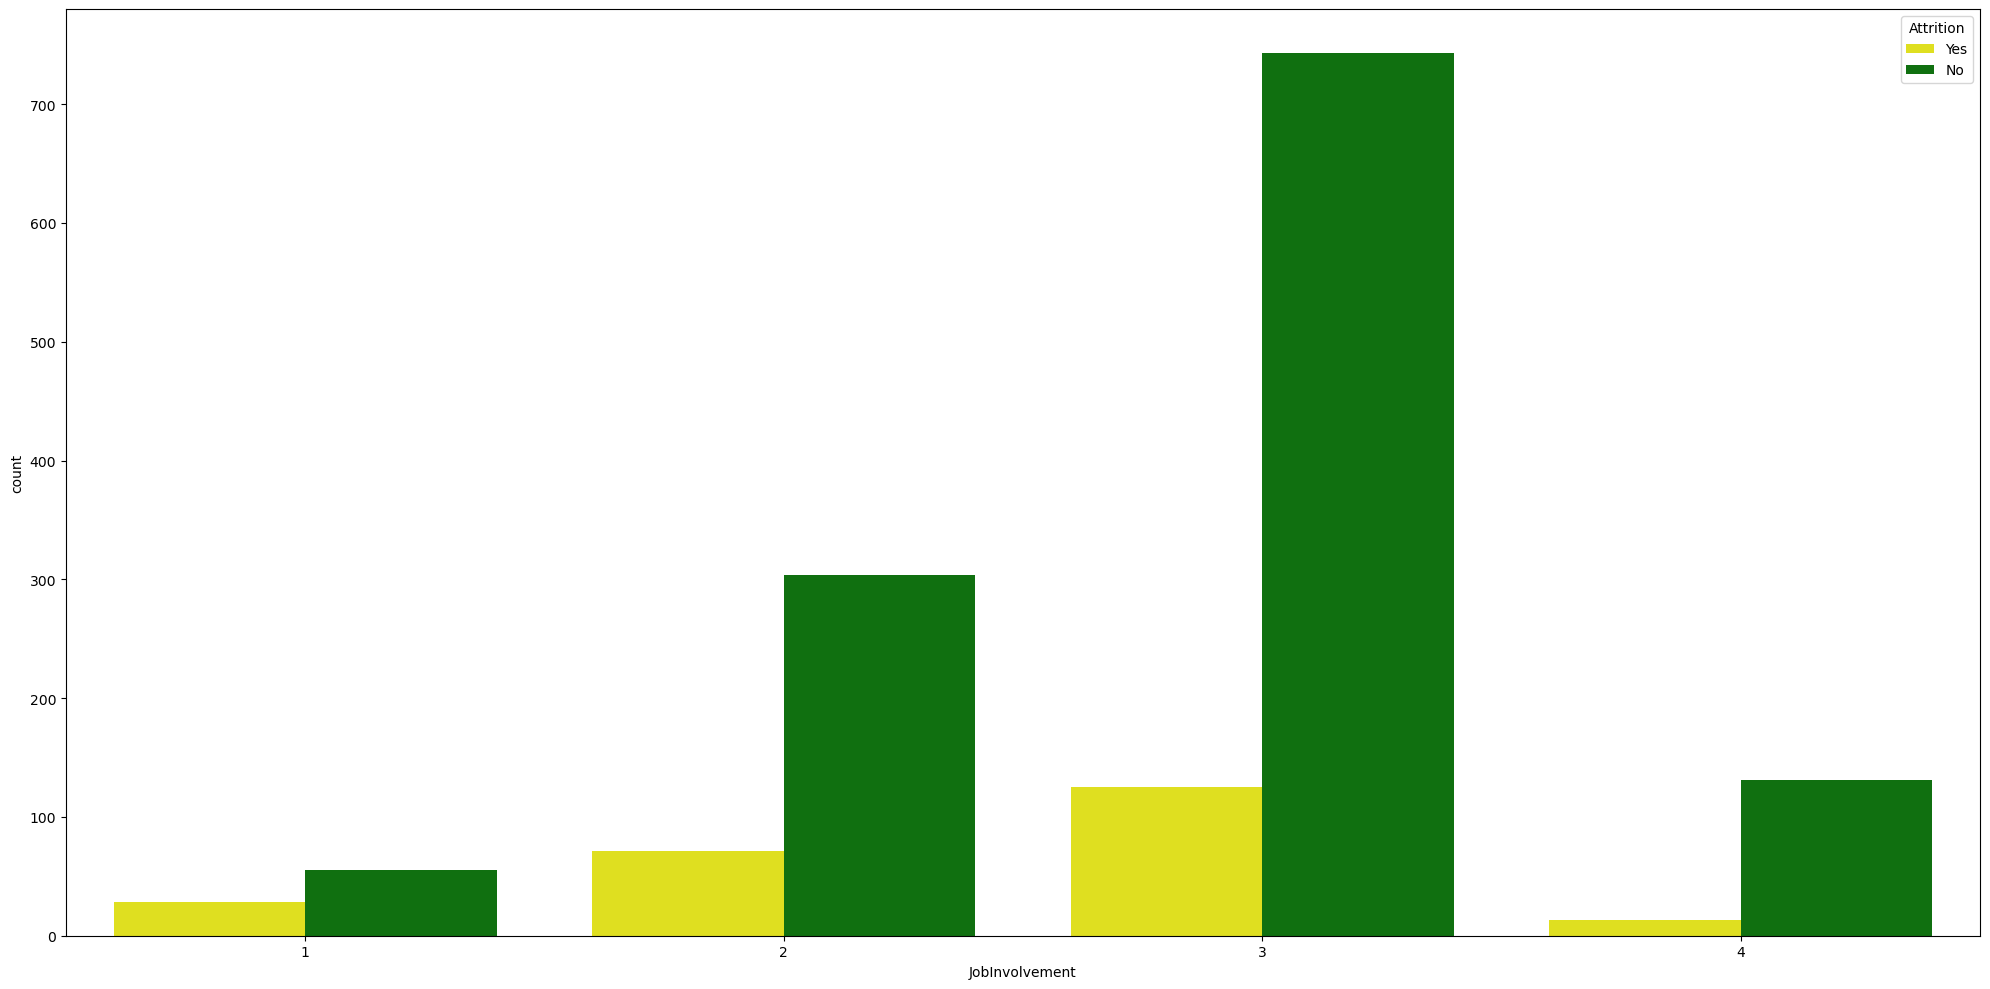

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(new_data['JobInvolvement'],
              hue = new_data['Attrition'],
              palette = ('yellow', 'green'))
plt.tight_layout()

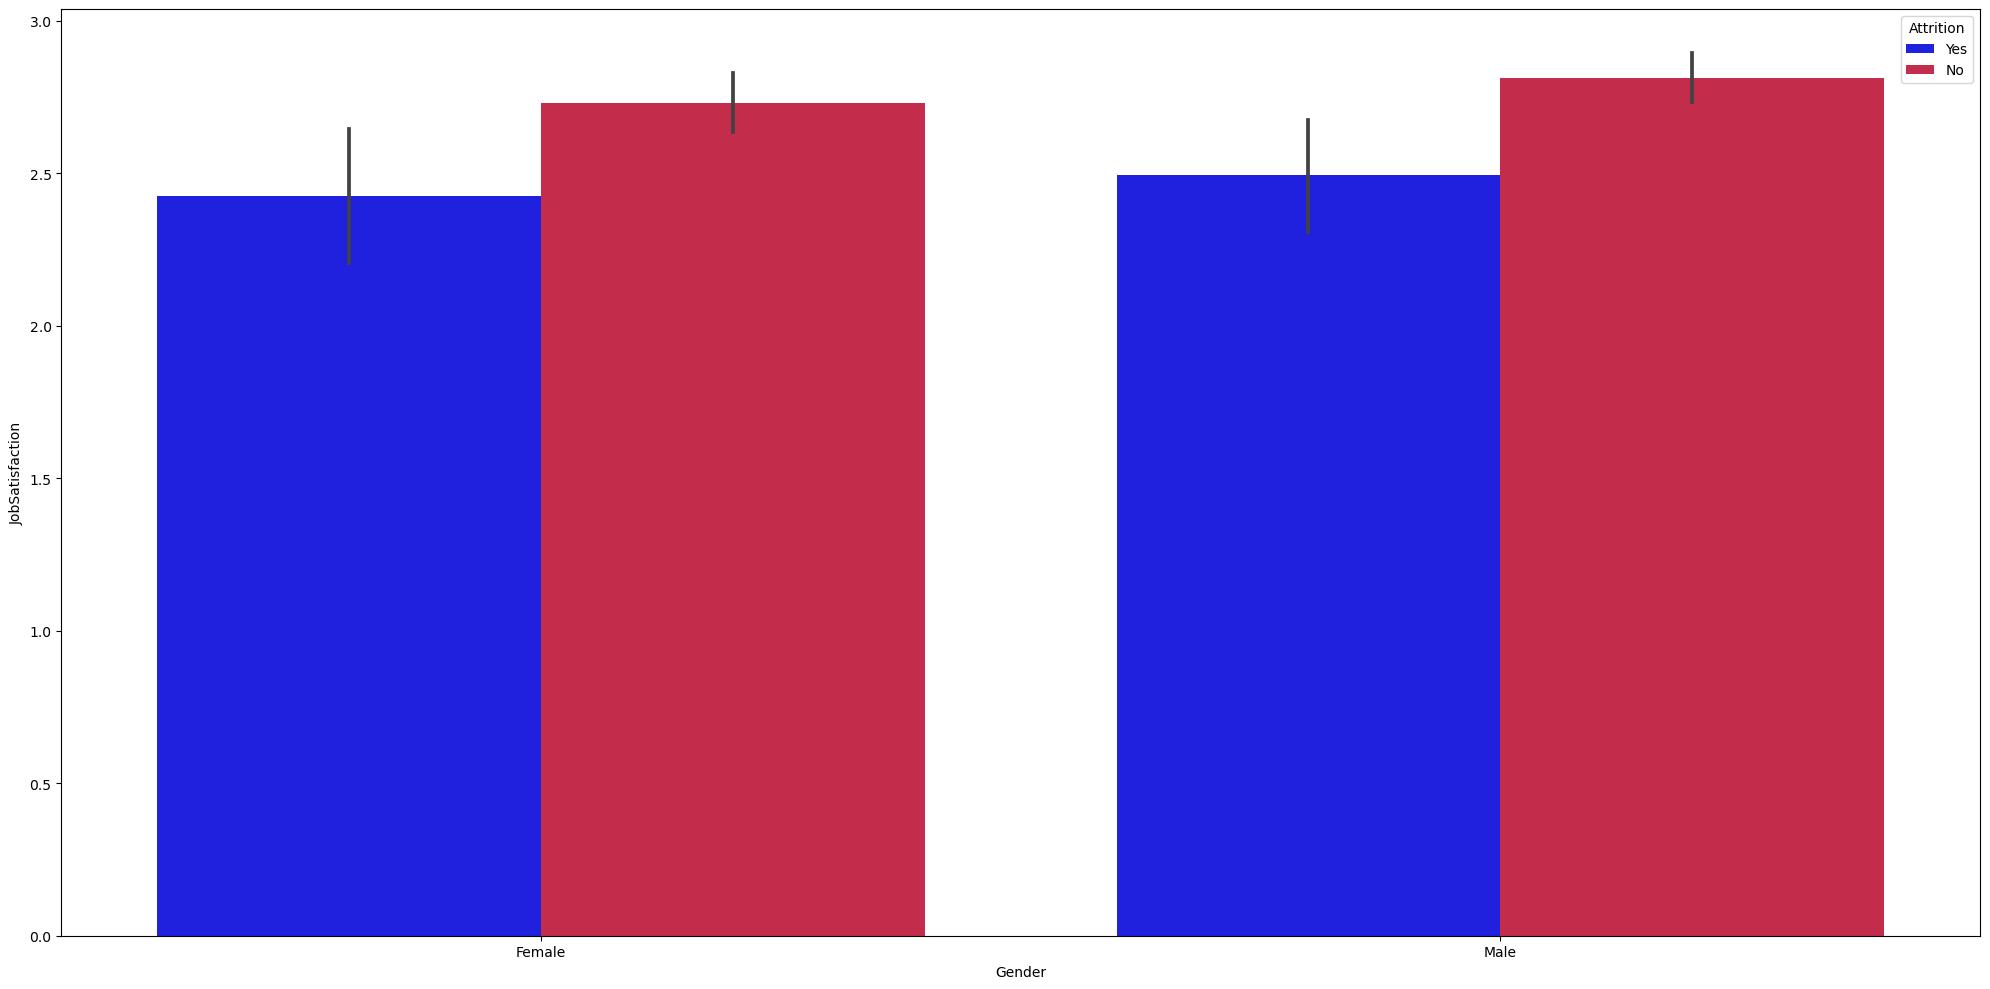

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=new_data.Gender,
            y=new_data.JobSatisfaction,
            hue=new_data.Attrition,
            palette = ('blue', 'crimson'))
plt.tight_layout()

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Data Preparation for Machine Learning

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [19]:
colname = new_data.select_dtypes(object).columns
colname

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
new_data[colname] = oe.fit_transform(new_data[colname])
new_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_5836\1022955468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[colname] = oe.fit_transform(new_data[colname])


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1,2,1.0,2,0.0,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,0.0,1.0,8,1,1.0,3,1.0,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1.0,1.0,2,2,4.0,4,1.0,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0.0,1.0,3,4,1.0,4,0.0,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,0.0,1.0,2,1,3.0,1,1.0,3,1,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,23,2,3.0,3,1.0,4,2,...,17,3,3,17,3,3,5,2,0,3
1466,39,0.0,1.0,6,1,3.0,4,1.0,2,3,...,15,3,1,9,5,3,7,7,1,7
1467,27,0.0,1.0,4,3,1.0,2,1.0,4,2,...,20,4,2,6,0,3,6,2,0,3
1468,49,0.0,2.0,2,3,3.0,4,1.0,2,2,...,14,3,4,17,3,2,9,6,0,8


In [ ]:
divide into features and target

In [21]:
features = new_data.iloc[:,2:]
features['Age'] = new_data.iloc[:,0:1]
target = new_data.iloc[:,1]

In [22]:
features

,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,2.0,1,2,1.0,2,0.0,3,2,7.0,4,...,3,1,8,0,1,6,4,0,5,41
1,1.0,8,1,1.0,3,1.0,2,2,6.0,2,...,4,4,10,3,3,10,7,1,7,49
2,1.0,2,2,4.0,4,1.0,2,1,2.0,3,...,3,2,7,3,3,0,0,0,0,37
3,1.0,3,4,1.0,4,0.0,3,1,6.0,3,...,3,3,8,3,3,8,7,3,0,33
4,1.0,2,1,3.0,1,1.0,3,1,2.0,2,...,3,4,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,23,2,3.0,3,1.0,4,2,2.0,4,...,3,3,17,3,3,5,2,0,3,36
1466,1.0,6,1,3.0,4,1.0,2,3,0.0,1,...,3,1,9,5,3,7,7,1,7,39
1467,1.0,4,3,1.0,2,1.0,4,2,4.0,2,...,4,2,6,0,3,6,2,0,3,27
1468,2.0,2,3,3.0,4,1.0,2,2,7.0,2,...,3,4,17,3,2,9,6,0,8,49


In [23]:
target

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [ ]:
Train and Test the model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

In [40]:
X_train.shape

(1249, 25)

In [41]:
X_test.shape

(221, 25)

In [42]:
y_train.shape

(1249,)

In [43]:
y_test.shape

(221,)

In [ ]:
build the model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

print('Accuracy {} %'.format(100*accuracy_score(y_pred, y_test)))

Accuracy 85.52036199095022 %


<AxesSubplot:>

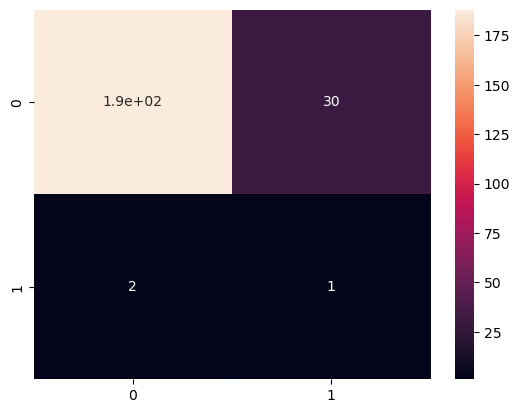

In [47]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       218
         1.0       0.03      0.33      0.06         3

    accuracy                           0.86       221
   macro avg       0.51      0.60      0.49       221
weighted avg       0.98      0.86      0.91       221



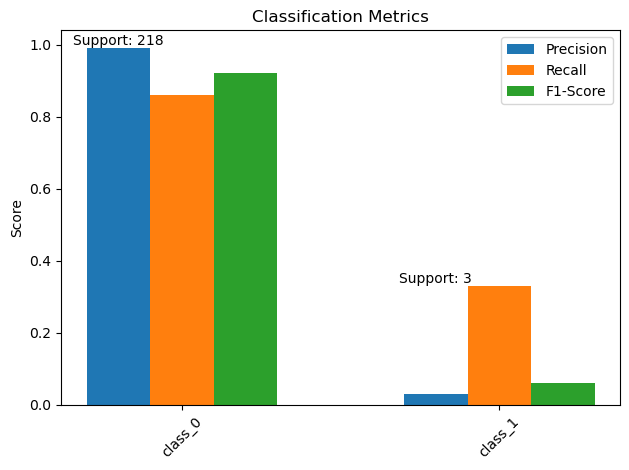

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# classification report
report = {
    'class_0': {'precision': 0.99, 'recall': 0.86, 'f1-score': 0.92, 'support': 218},
    'class_1': {'precision': 0.03, 'recall': 0.33, 'f1-score': 0.06, 'support': 3}
}

# Extract relevant metrics from the classification report
classes = []
precision = []
recall = []
f1_score = []
support = []

for class_name, metrics in report.items():
    classes.append(class_name)
    precision.append(metrics['precision'])
    recall.append(metrics['recall'])
    f1_score.append(metrics['f1-score'])
    support.append(metrics['support'])
    
# Convert class names to numerical indices
class_indices = range(len(classes))

# Plot the metrics
fig, ax = plt.subplots()
ax.bar(class_indices, precision, width=0.2, label='Precision')
ax.bar([c + 0.2 for c in class_indices], recall, width=0.2, label='Recall')
ax.bar([c + 0.4 for c in class_indices], f1_score, width=0.2, label='F1-Score')
ax.set_xticks([c + 0.2 for c in class_indices])
ax.set_xticklabels(classes)
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
ax.legend()

# Adding support values on top of bars
for i, supp in enumerate(support):
    ax.text(i, max(precision[i], recall[i], f1_score[i]), f'Support: {supp}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
print(confusion_matrix(y_pred, y_test))

[[188  30]
 [  2   1]]


In [51]:
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation

In [ ]:
# plotting an ROC Curve

In [52]:
def plot_roc(model, X_test, y_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

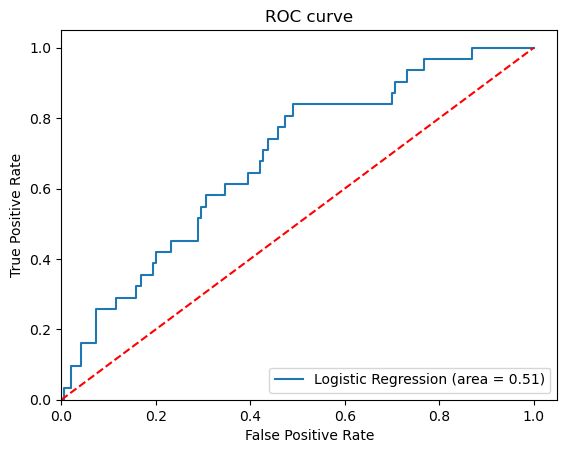

In [53]:
plot_roc(model, X_test, y_test)

In [ ]:
# performing cross validation to ensure efficiency of the model

In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.83009709 0.8592233  0.82038835 0.83980583 0.84390244]


In [ ]:
# Making a dummy prediction

In [48]:
def predict():
    a1=int(input('Enter your Age: '))
    a2=eval(input('Enter your Department no: '))
    a3=eval(input('Enter your Distance From Home: '))
    a4=eval(input('Enter your Education Level: '))
    a5=eval(input('Enter your Education Field: '))
    a6=eval(input('Enter Environment Satisfaction Level: '))
    a7=eval(input('Enter your Gender 0 for female & 1 for male: '))
    a8=eval(input('Enter Job Involvement Level: '))
    a9=eval(input('Enter Job Level: '))
    a10=eval(input('Enter your Job Role no: '))
    a11=eval(input('Enter Job Satisfaction Level: '))
    a12=eval(input('Enter Marital Status: '))
    a13=eval(input('Enter Monthly Income: '))
    a14=eval(input('No of Companies Worked before: '))
    a15=eval(input('Enter 0 for no Overtime and 1 for Overtime: '))
    a16=eval(input('Enter Percentage Salary Hike: '))
    a17=eval(input('Employee Perfromance Rating: '))
    a18=eval(input('Enter Relationship Satisfaction Level: '))
    a19=eval(input('Enter your Years of Work Experience: '))
    a20=eval(input('Enter Training times last year: '))
    a21=eval(input('Enter Level of Work Life Balance: '))
    a22=eval(input('Enter Years at Current Company: '))
    a23=eval(input('Enter your Years in current role: '))
    a24=eval(input('Enter the year you were last promoted: '))
    a25=eval(input('Enter your Year with current manager: '))
    
    newob=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25]
    
    ans=model.predict([newob])[0]
    
    if ans==1:
        print('\nEmployee will leave the company')
    else:
        print('\nEmployee will stay')
        return ans 
        

In [49]:
predict() 

Enter your Age: 31
Enter your Department no: 2
Enter your Distance From Home: 2
Enter your Education Level: 4
Enter your Education Field: 4
Enter Environment Satisfaction Level: 3
Enter your Gender 0 for female & 1 for male: 1
Enter Job Involvement Level: 4
Enter Job Level: 3
Enter your Job Role no: 3
Enter Job Satisfaction Level: 4
Enter Marital Status: 1
Enter Monthly Income: 20000
No of Companies Worked before: 2
Enter 0 for no Overtime and 1 for Overtime: 1
Enter Percentage Salary Hike: 15
Employee Perfromance Rating: 4
Enter Relationship Satisfaction Level: 3
Enter your Years of Work Experience: 5
Enter Training times last year: 0
Enter Level of Work Life Balance: 2
Enter Years at Current Company: 3
Enter your Years in current role: 2
Enter the year you were last promoted: 1
Enter your Year with current manager: 1

Employee will leave the company
